### Summary of Categorical Var

In [3]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust

import seaborn as sns
import matplotlib.pylab as plt

import matplotlib.font_manager as fm
import matplotlib

fm.get_fontconfig_fonts()
font_location = "c:/windows/Fonts/malgun.ttf"
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

Loan Data
- P2P 방식의 대출 사업을 선도하고 있는 Lending Club에서 제공하는 데이터
- 대출등급(grade) : A-G
- 대출상환 상태(status) : Fully paid(전액 상환), Current(진행 중), Late(연체), ChargedOff(삭제: 대출 잔여금 회수 불능)

In [4]:
data_path = "./data/"

lc_loans = pd.read_csv(data_path+'lc_loans.csv')
lc_loans.head()

,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B


In [6]:
lc_loans.shape, lc_loans.dtypes

((450961, 2),
 status    object
 grade     object
 dtype: object)

In [7]:
lc_loans.describe()
# top: mode (최빈값)

,status,grade
count,450961,450961
unique,4,7
top,Current,B
freq,321185,132370


In [8]:
lc_loans.status.nunique()

4

In [9]:
lc_loans.status.value_counts()

Current        321185
Fully Paid      97316
Charged Off     22671
Late             9789
Name: status, dtype: int64

In [10]:
lc_loans.grade.nunique()

7

In [11]:
lc_loans.grade.value_counts()

B    132370
C    120875
D     74277
A     72490
E     34804
F     12904
G      3241
Name: grade, dtype: int64

In [12]:
lc_loans.isna().sum()

status    0
grade     0
dtype: int64

In [13]:
lc_loans.status= lc_loans.status.astype('category')
lc_loans.grade = lc_loans.grade.astype('category')

lc_loans.dtypes

status    category
grade     category
dtype: object

In [14]:
lc_loans.status.value_counts(sort=False)

Charged Off     22671
Current        321185
Fully Paid      97316
Late             9789
Name: status, dtype: int64

In [15]:
lc_loans.grade.value_counts(sort=False)

A     72490
B    132370
C    120875
D     74277
E     34804
F     12904
G      3241
Name: grade, dtype: int64

In [16]:
# 범주 순서 변경
lc_loans.status = lc_loans.status.cat.reorder_categories(['Fully Paid', 'Current','Late', 'Charged Off' ])
lc_loans.status.value_counts(sort=False)

Fully Paid      97316
Current        321185
Late             9789
Charged Off     22671
Name: status, dtype: int64

#### 막대도표 (Bar plot)

In [18]:
status_tab = lc_loans.status.value_counts(sort=False)
status_tab

Fully Paid      97316
Current        321185
Late             9789
Charged Off     22671
Name: status, dtype: int64

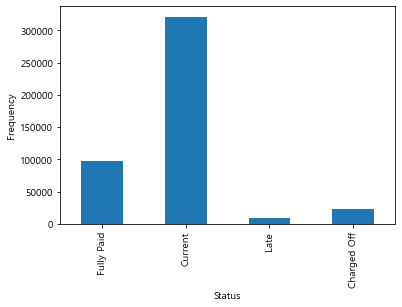

In [19]:
ax = status_tab.plot.bar()
ax.set_xlabel('Status')
ax.set_ylabel('Frequency')
plt.show()

In [21]:
lc_loans.status.value_counts().index.tolist()

['Current', 'Fully Paid', 'Charged Off', 'Late']

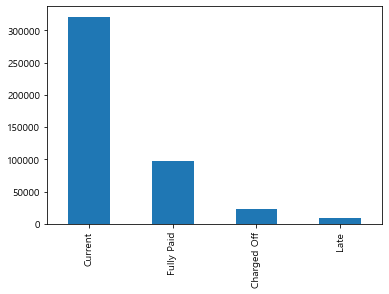

In [20]:
# 빈도수순으로 정렬
lc_loans_re = lc_loans.copy()
lc_loans_re.status = lc_loans_re.status.cat.reorder_categories(lc_loans.status.value_counts().index.tolist())

lc_loans_re.status.value_counts().plot.bar()
ax.set_xlabel('Status')
ax.set_ylabel('Frequency')
plt.show()

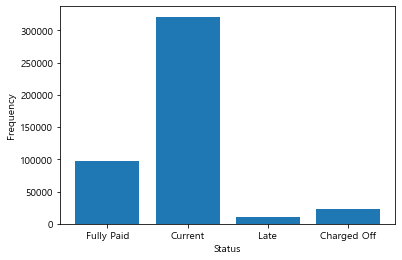

In [24]:
## stateful interface
plt.bar(status_tab.index,status_tab)
plt.xlabel('Status')
plt.ylabel('Frequency')
plt.show()

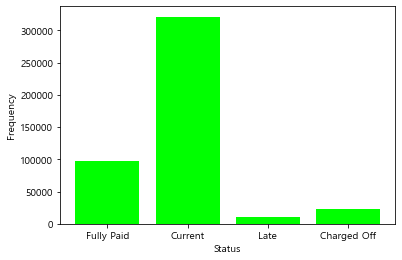

In [25]:
fig, ax = plt.subplots()
ax.bar(status_tab.index, status_tab, color='lime')
ax.set_xlabel('Status')
ax.set_ylabel('Frequency')
plt.show()

#### 원 그래프 (Pie Chart)

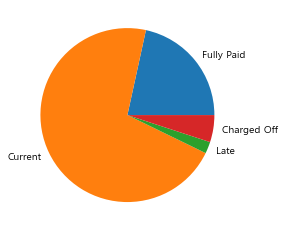

In [23]:
ax = status_tab.plot.pie()
ax.set_ylabel('')
plt.show()

#### Color Map

In [28]:
from matplotlib import cm 
colors = cm.get_cmap('Set2')(np.arange(4))
colors

array([[0.4       , 0.76078431, 0.64705882, 1.        ],
       [0.98823529, 0.55294118, 0.38431373, 1.        ],
       [0.55294118, 0.62745098, 0.79607843, 1.        ],
       [0.90588235, 0.54117647, 0.76470588, 1.        ]])

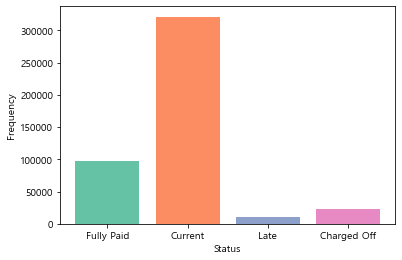

In [29]:
fig, ax = plt.subplots()
ax.bar(status_tab.index, status_tab, color=colors)
ax.set_xlabel('Status')
ax.set_ylabel('Frequency')
plt.show()

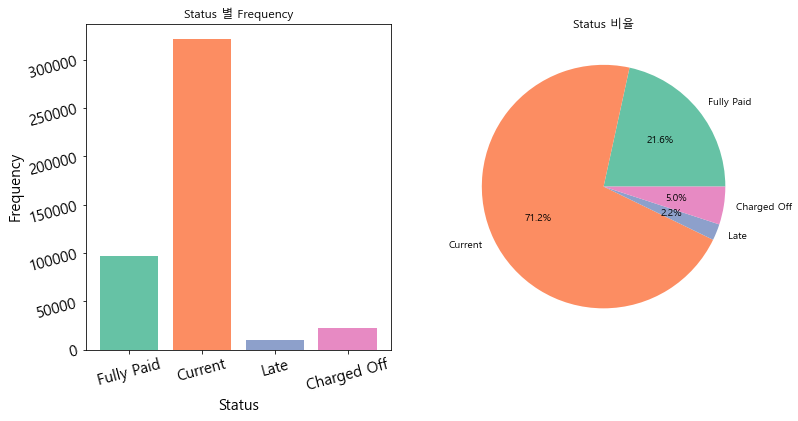

In [30]:
fig, axes = plt.subplots(1,2, figsize=(12,6))
axes[0].bar(status_tab.index, status_tab, color=colors)
axes[0].set_xlabel('Status', fontsize=15)
axes[0].tick_params(axis = 'x', labelsize = 15, labelrotation = 15)
# tick_params() 함수를 통해 틱(tick)의 스타일을 바꿀 수 있음
axes[0].set_ylabel('Frequency', fontsize = 15)
axes[0].tick_params(axis = 'y', labelsize = 15, labelrotation = 15)
axes[0].set_title('Status 별 Frequency') # 개별 object의 title 설정

axes[1].pie(status_tab, labels = status_tab.index, autopct = "%.1f%%", colors=colors) # autopct : 소수점 몇번째 자리 까지 표시할지
axes[1].set_title('Status 비율')
plt.show()

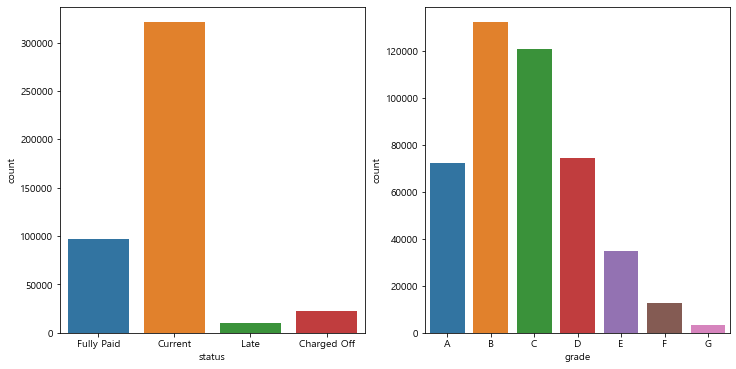

In [31]:
import seaborn as sns
fig, axes = plt.subplots(1,2, figsize=(12,6))
sns.countplot(x='status', data=lc_loans, ax = axes[0]) 
sns.countplot(x='grade', data=lc_loans, ax = axes[1]) 
plt.show()

#### 누적 차트 (Stacked)

In [33]:
tab = pd.crosstab(lc_loans.status, lc_loans.grade)
tab

grade,A,B,C,D,E,F,G
status,,,,,,,
Fully Paid,20408,31160,23147,13681,5949,2328,643
Current,50051,93852,88928,53281,24639,8444,1990
Late,469,2056,2777,2308,1374,606,199
Charged Off,1562,5302,6023,5007,2842,1526,409


In [34]:
from scipy.stats import chi2_contingency
result = chi2_contingency(tab)
result

(9594.458333551105,
 0.0,
 18,
 array([[1.56431196e+04, 2.85650398e+04, 2.60844541e+04, 1.60287487e+04,
         7.51059640e+03, 2.78464360e+03, 6.99397855e+02],
        [5.16290780e+04, 9.42770183e+04, 8.60900097e+04, 5.29018213e+04,
         2.47882250e+04, 9.19053142e+03, 2.30831621e+03],
        [1.57353875e+03, 2.87335253e+03, 2.62383083e+03, 1.61232912e+03,
         7.55489623e+02, 2.80106830e+02, 7.03523121e+01],
        [3.64426367e+03, 6.65458935e+03, 6.07670536e+03, 3.73410088e+03,
         1.74968896e+03, 6.48718146e+02, 1.62933626e+02]]))

In [35]:
print('통계량:', result[0]) # 통계량
print('P-value:', result[1]) # p-value
print('Degree of Freedom:',result[2]) # 자유도
print('기대 빈도:', result[3]) # 기대 빈도

# P-value가 너무 작아, 두 변수가 독립이라는 귀무가설은 기각

통계량: 9594.458333551105
P-value: 0.0
Degree of Freedom: 18
기대 빈도: [[1.56431196e+04 2.85650398e+04 2.60844541e+04 1.60287487e+04
  7.51059640e+03 2.78464360e+03 6.99397855e+02]
 [5.16290780e+04 9.42770183e+04 8.60900097e+04 5.29018213e+04
  2.47882250e+04 9.19053142e+03 2.30831621e+03]
 [1.57353875e+03 2.87335253e+03 2.62383083e+03 1.61232912e+03
  7.55489623e+02 2.80106830e+02 7.03523121e+01]
 [3.64426367e+03 6.65458935e+03 6.07670536e+03 3.73410088e+03
  1.74968896e+03 6.48718146e+02 1.62933626e+02]]


In [36]:
pd.crosstab(lc_loans.status, lc_loans.grade, margins=True) # margins = True 이면 All 열이 생긴다.

grade,A,B,C,D,E,F,G,All
status,,,,,,,,
Fully Paid,20408,31160,23147,13681,5949,2328,643,97316
Current,50051,93852,88928,53281,24639,8444,1990,321185
Late,469,2056,2777,2308,1374,606,199,9789
Charged Off,1562,5302,6023,5007,2842,1526,409,22671
All,72490,132370,120875,74277,34804,12904,3241,450961


In [37]:
pd.crosstab(lc_loans.status, lc_loans.grade, margins=True, normalize = 'index') #  →방향으로 정규화

grade,A,B,C,D,E,F,G
status,,,,,,,
Fully Paid,0.209709,0.320194,0.237854,0.140583,0.061131,0.023922,0.006607
Current,0.155832,0.292205,0.276875,0.165889,0.076713,0.026290,0.006196
Late,0.047911,0.210032,0.283686,0.235775,0.140362,0.061906,0.020329
Charged Off,0.068899,0.233867,0.265670,0.220855,0.125358,0.067311,0.018041
All,0.160746,0.293529,0.268039,0.164708,0.077177,0.028614,0.007187


In [38]:
pd.crosstab(lc_loans.status, lc_loans.grade, margins=True, normalize = 'columns') # ↓ 방향으로 방향으로

grade,A,B,C,D,E,F,G,All
status,,,,,,,,
Fully Paid,0.281528,0.235401,0.191495,0.184189,0.170929,0.180409,0.198396,0.215797
Current,0.690454,0.709013,0.735702,0.717328,0.707936,0.654371,0.614008,0.712223
Late,0.006470,0.015532,0.022974,0.031073,0.039478,0.046962,0.061401,0.021707
Charged Off,0.021548,0.040054,0.049828,0.067410,0.081657,0.118258,0.126196,0.050273


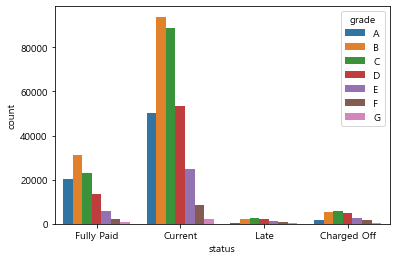

In [39]:
# 두 범주형 변수를 사용한 Bar plot
sns.countplot(x="status", hue="grade", data=lc_loans) # hue  : category 값
plt.show()

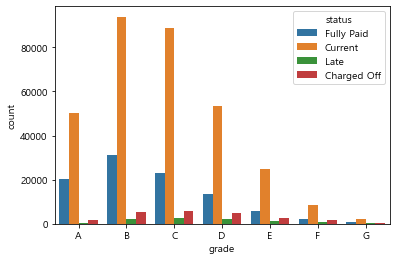

In [40]:
sns.countplot(x="grade", hue="status", data=lc_loans)
plt.show()

In [41]:
# 누적 차트를 그리기 위한 정규화된 테이블 생성
xtab_col = pd.crosstab(lc_loans.status, lc_loans.grade, margins=True, normalize = 'columns')
xtab_col

grade,A,B,C,D,E,F,G,All
status,,,,,,,,
Fully Paid,0.281528,0.235401,0.191495,0.184189,0.170929,0.180409,0.198396,0.215797
Current,0.690454,0.709013,0.735702,0.717328,0.707936,0.654371,0.614008,0.712223
Late,0.006470,0.015532,0.022974,0.031073,0.039478,0.046962,0.061401,0.021707
Charged Off,0.021548,0.040054,0.049828,0.067410,0.081657,0.118258,0.126196,0.050273


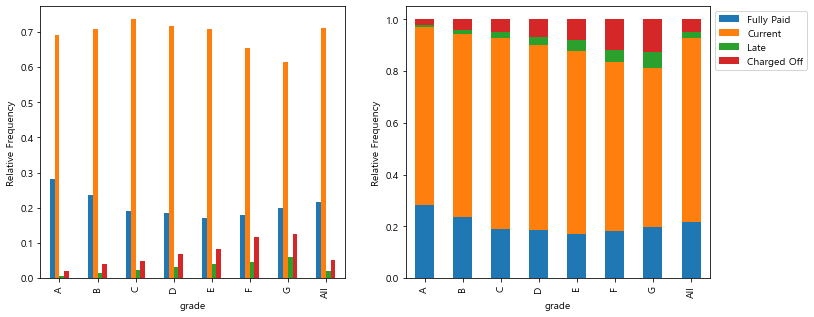

In [42]:
# Grade별 Status의 비율 합이 100%가 되도록 정규화
fig, axes = plt.subplots(1,2, figsize=(12,5))

xtab_col.T.plot.bar(ax = axes[0], legend=False, ylabel = 'Relative Frequency')
xtab_col.T.plot.bar(stacked = True, ax = axes[1], ylabel = 'Relative Frequency') # stacked = True 위로 쌓는것
axes[1].legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

# 왼쪽과 오른쪽은 동일한 데이터를 사용한 그래프이지만, 오른쪽은 그래프를 누적시킨 형태

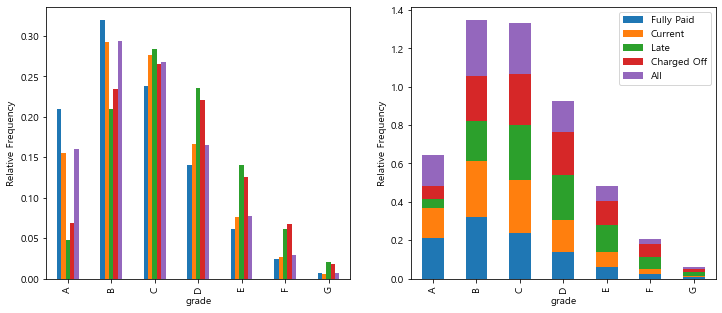

In [45]:
# Status별 Grade의 비율 합이 100%가 되도록 정규화
xtab_col = pd.crosstab(lc_loans.status, lc_loans.grade, margins=True, normalize = 'index')

fig, axes = plt.subplots(1,2, figsize=(12,5))

xtab_col.T.plot.bar(ax = axes[0], legend=False, ylabel = 'Relative Frequency')
xtab_col.T.plot.bar(stacked = True, ax = axes[1], ylabel = 'Relative Frequency') # stacked = True 위로 쌓는것
axes[1].legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

UCB Data
- UC Berkeley 대학원의 6개 학과에 지원한 학생의 성별과 합격여부에 대한 자료
- Freq : 조건이 동일한 사람의 수

In [46]:
ucb = pd.read_csv(data_path + 'UCBAdmissions.csv', index_col = 0)
ucb

,Admit,Gender,Dept,Freq
1,Admitted,Male,A,512
2,Rejected,Male,A,313
3,Admitted,Female,A,89
4,Rejected,Female,A,19
5,Admitted,Male,B,353
6,Rejected,Male,B,207
7,Admitted,Female,B,17
8,Rejected,Female,B,8
9,Admitted,Male,C,120
10,Rejected,Male,C,205


In [47]:
# 성별, 학과별 지원자의 빈도는 어떻게 다른가?
ucb_gender_dept = ucb.pivot_table(index='Dept', columns = 'Gender', values='Freq', aggfunc = 'sum')
ucb_gender_dept

Gender,Female,Male
Dept,,
A,108,825
B,25,560
C,593,325
D,375,417
E,393,191
F,341,373


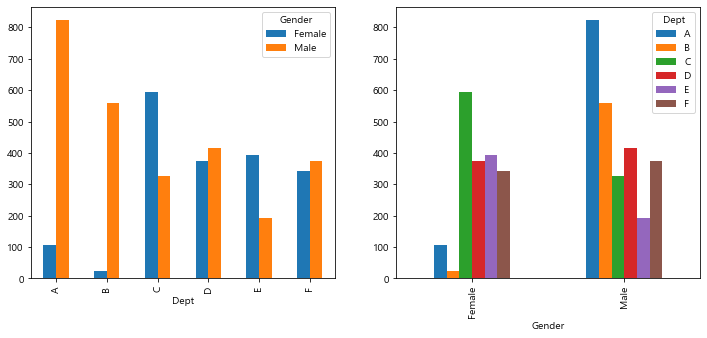

In [48]:
fig, axes = plt.subplots(1,2, figsize= (12,5))
ucb_gender_dept.plot.bar(ax = axes[0])
ucb_gender_dept.T.plot.bar(ax = axes[1])
plt.show()

In [49]:
# 성별, 학과별 지원자의 비율은 어떻게 다른가?
ucb_gender_dept = ucb.pivot_table(index = 'Dept', columns= 'Gender', values = 'Freq', aggfunc = 'sum', margins =True)
ucb_gender_dept

Gender,Female,Male,All
Dept,,,
A,108,825,933
B,25,560,585
C,593,325,918
D,375,417,792
E,393,191,584
F,341,373,714
All,1835,2691,4526


In [50]:
ucb_gender_dept_rowprop = ucb_gender_dept.divide(ucb_gender_dept['All'], axis = 0) # → 방향으로 나눔
ucb_gender_dept_colprop = ucb_gender_dept.divide(ucb_gender_dept.loc['All',:], axis = 1)

In [51]:
ucb_gender_dept_rowprop

Gender,Female,Male,All
Dept,,,
A,0.115756,0.884244,1.0
B,0.042735,0.957265,1.0
C,0.645969,0.354031,1.0
D,0.473485,0.526515,1.0
E,0.672945,0.327055,1.0
F,0.477591,0.522409,1.0
All,0.405435,0.594565,1.0


In [52]:
ucb_gender_dept_colprop

Gender,Female,Male,All
Dept,,,
A,0.058856,0.306577,0.206142
B,0.013624,0.208101,0.129253
C,0.323161,0.120773,0.202828
D,0.204360,0.154961,0.174989
E,0.214169,0.070977,0.129032
F,0.185831,0.138610,0.157755
All,1.000000,1.000000,1.000000


In [53]:
ucb_gender_dept_rowprop = ucb_gender_dept_rowprop.iloc[:-1, :-1]
ucb_gender_dept_colprop = ucb_gender_dept_colprop.iloc[:-1, :-1]

In [54]:
ucb_gender_dept_rowprop

Gender,Female,Male
Dept,,
A,0.115756,0.884244
B,0.042735,0.957265
C,0.645969,0.354031
D,0.473485,0.526515
E,0.672945,0.327055
F,0.477591,0.522409


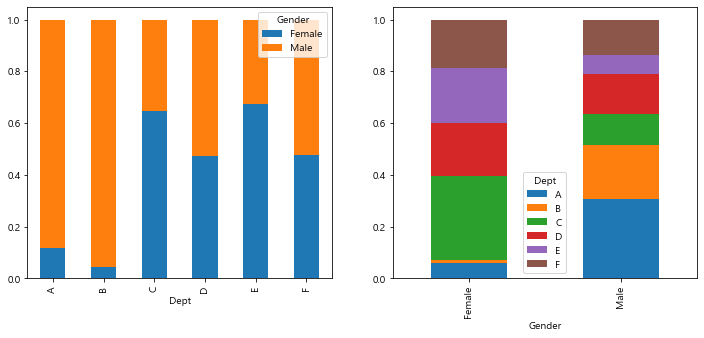

In [55]:
fig, axes = plt.subplots(1,2, figsize = (12,5))
ucb_gender_dept_rowprop.plot.bar(ax = axes[0], stacked = True)
ucb_gender_dept_colprop.T.plot.bar(ax = axes[1], stacked = True)
plt.show()

In [59]:
# 성별, 학과별 지원자의 합격률은 어떻게 다른가?
ucb_all = ucb.pivot_table(index = 'Gender', columns = 'Admit', values = 'Freq', aggfunc = 'sum', margins = True)
ucb_all

Admit,Admitted,Rejected,All
Gender,,,
Female,557,1278,1835
Male,1198,1493,2691
All,1755,2771,4526


In [60]:
ucb_all.divide(ucb_all['All'], axis = 0)

Admit,Admitted,Rejected,All
Gender,,,
Female,0.303542,0.696458,1.0
Male,0.445188,0.554812,1.0
All,0.387760,0.612240,1.0


In [62]:
# 성별, 학과별 전체 지원자
ucb_all = ucb.pivot_table(index = 'Dept', columns = 'Gender', values ='Freq', aggfunc = 'sum')
ucb_all

Gender,Female,Male
Dept,,
A,108,825
B,25,560
C,593,325
D,375,417
E,393,191
F,341,373


In [63]:
# 성별, 학과별 합격자
ucb_admit = ucb.loc[ucb.Admit == 'Admitted', :].pivot_table(index = 'Dept', columns = 'Gender', values = 'Freq')
ucb_admit

Gender,Female,Male
Dept,,
A,89,512
B,17,353
C,202,120
D,131,138
E,94,53
F,24,22


In [64]:
ucb_ratio = ucb_admit/ucb_all

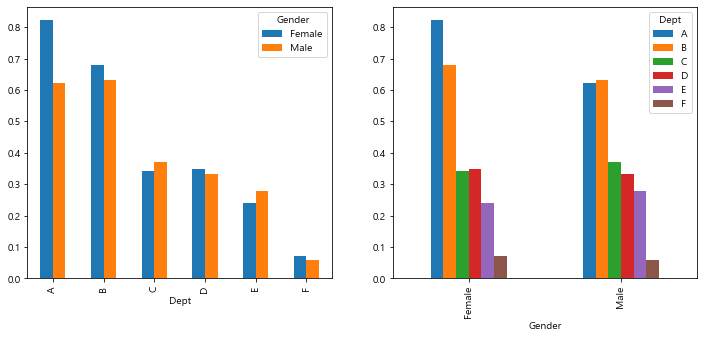

In [65]:
fig, axes = plt.subplots(1,2, figsize = (12,5))
ucb_ratio.plot.bar(ax = axes[0])
ucb_ratio.T.plot.bar(ax = axes[1])
plt.show()

### 모자이크 차트 (Mosaic plot)

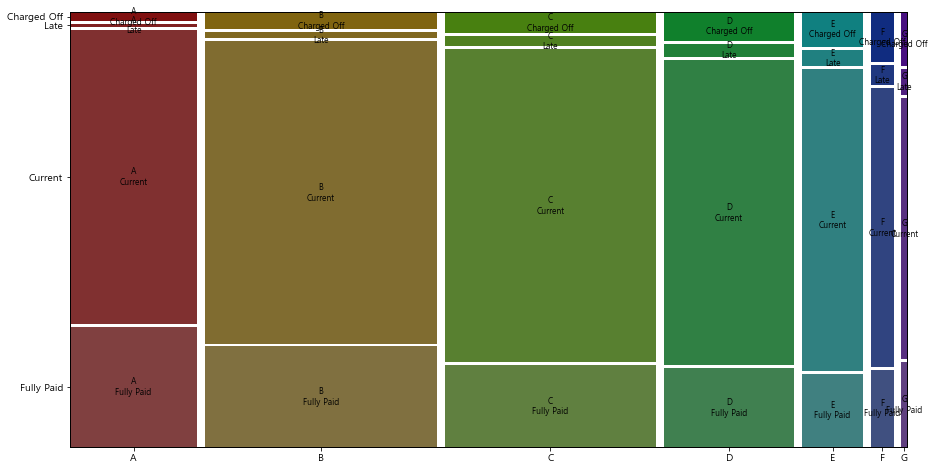

In [67]:
# Grade가 높을수록 Fully Paid의 비율이 높은 것을 확인 가능
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams['figure.figsize'] = [15, 8] 
                                     #먼저 받는 인자가 기준이 된다. 
mosaic(lc_loans.sort_values('grade'), ['grade', 'status'],axes_label=True, gap=0.01)
plt.show() # 가로로는 grade의 비율, 세로는 각 grade 안에서 status 비율

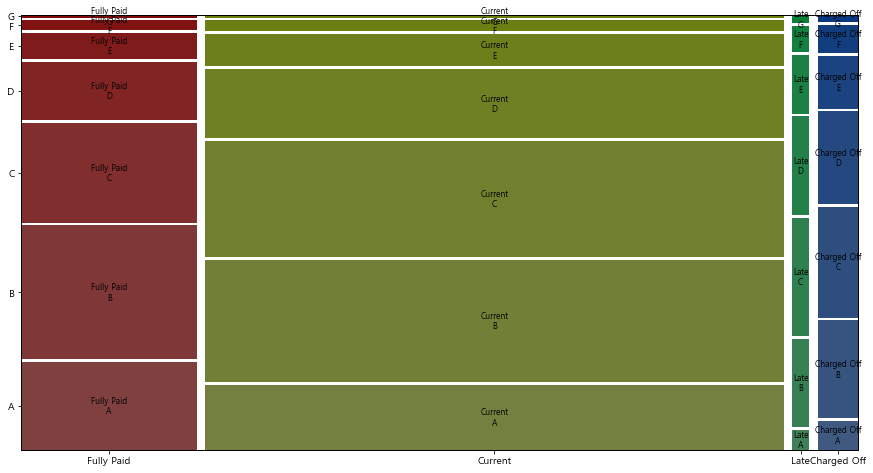

In [68]:
plt.rcParams['figure.figsize'] = [15, 8]
                                   
mosaic(lc_loans.sort_values('grade'), ['status', 'grade'],axes_label=True, gap=0.01)
plt.show()

#### Sunburst Plot

In [70]:
import plotly.express as px

df = px.data.gapminder().query("year == 2007")

In [72]:
df.head() # 계층을 가진 범주형 데이터라는 의미는 continent 안에 country가 속해져 있다.

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32


In [73]:
fig = px.sunburst(df, path=['continent', 'country'], values='pop',
                  color='lifeExp', hover_data=['iso_alpha'],
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(df['lifeExp'], weights=df['pop']))
fig.show()

In [74]:
px.sunburst(lc_loans, path = ['grade','status'])